# Gold Price Analysis and Prediction

# Problem Statement:
This project aims to leverage a comprehensive dataset of daily gold prices spanning from January 19, 
2014, to January 22, 2024, obtained from Nasdaq. 

# DataSet Description
The dataset encompasses key financial metrics for each trading day, including the opening and closing prices, trading volume, as well as the highest and 
lowest prices recorded during the day.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:/Mentorness Internship/ML/Gold Price prediction/goldstock.csv')

In [3]:
print(data.head())
print(data.info())
print(data.describe())

   Unnamed: 0        Date   Close    Volume    Open    High     Low
0           0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1           1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2           2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3           3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4           4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB
None
        Unnamed: 0        Close         Volume  

In [4]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values if any
data = data.dropna()  # Drop rows with missing values, or use imputation techniques

Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64


In [5]:
# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

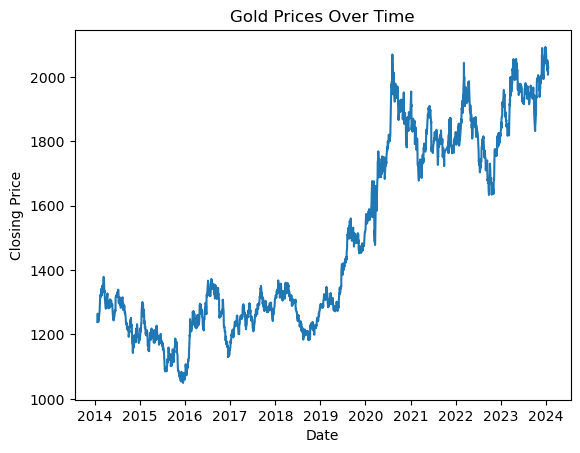

In [6]:
# Visualize basic trends
import matplotlib.pyplot as plt

plt.plot(data['Date'], data['Close'])
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Visualize Time Series

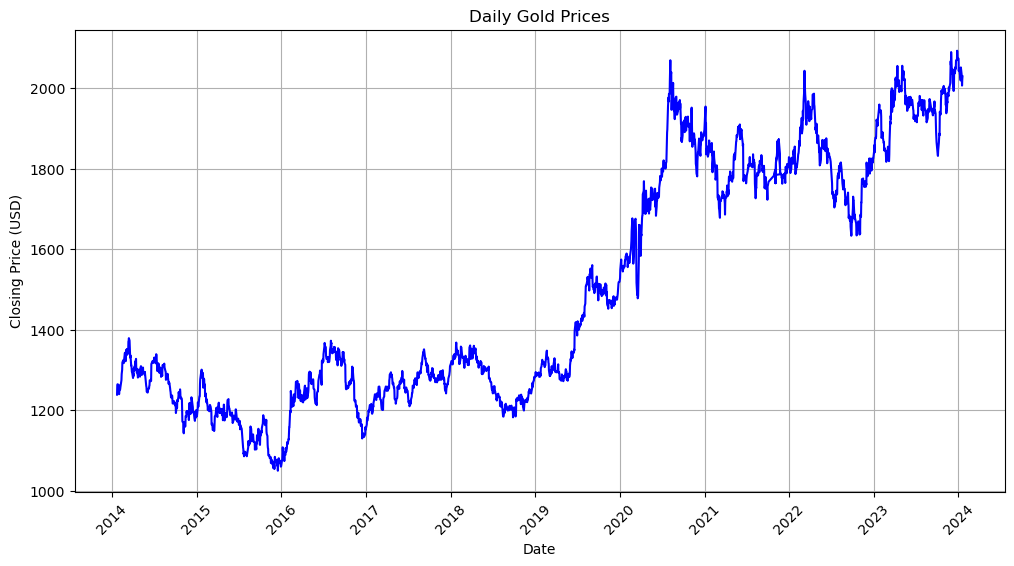

In [8]:
# Time series plot of Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], color='blue')
plt.title('Daily Gold Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

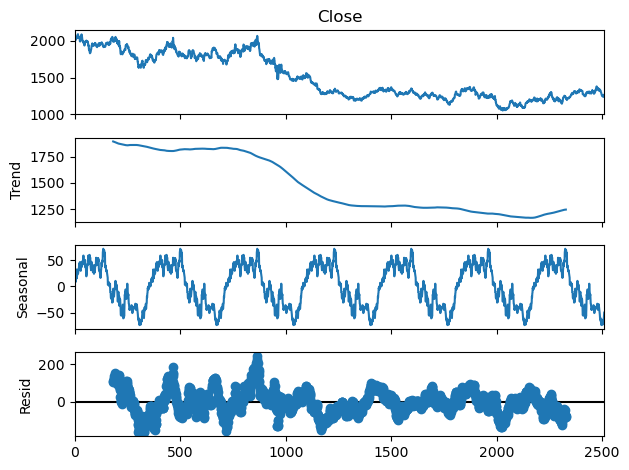

In [9]:
# Decomposition visualization
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Close'], model='additive', period=365)
result.plot()
plt.show()

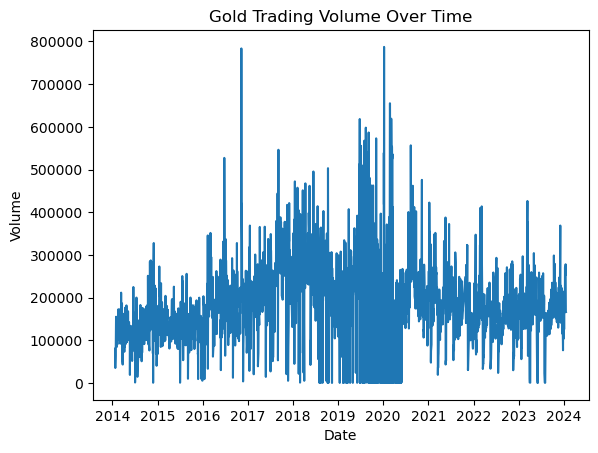

In [10]:
# Other feature visualizations
plt.plot(data['Date'], data['Volume'])
plt.title('Gold Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

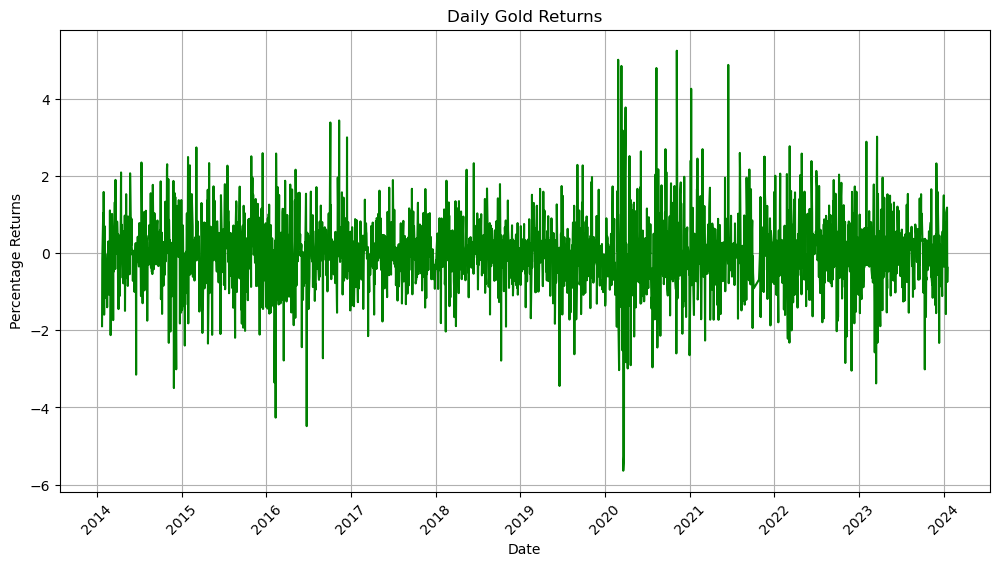

In [11]:
# Example: Calculating daily returns
data['Returns'] = data['Close'].pct_change() * 100

# Plotting daily returns
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Returns'], color='green')
plt.title('Daily Gold Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Returns')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Predictive models for future gold price forecasting.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
# Assuming 'X' contains features and 'y' contains target variable (gold prices)
X = data[['Volume', 'Open', 'High', 'Low']]  # Example features
y = data['Close']  # Target variable

In [15]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Make predictions on the testing set
predictions = model.predict(X_test)

In [18]:
# Model Evaluation
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 5.707705113659733


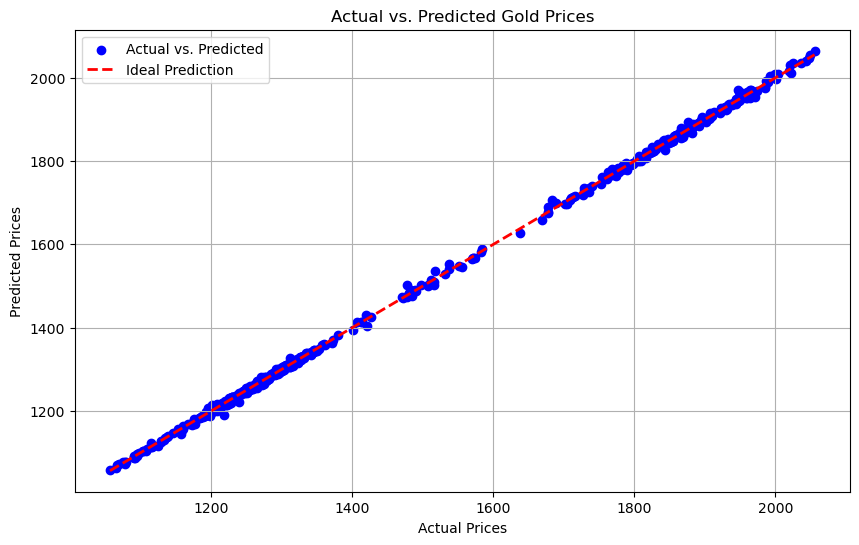

In [19]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Ideal Prediction')
plt.title('Actual vs. Predicted Gold Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

# Back-tested trading strategies with performance metrics.

In [21]:
# Assuming 'data' contains historical gold price data with 'Date' and 'Close' columns

# Define trading strategy
short_window = 50  # Short-term moving average window
long_window = 200  # Long-term moving average window

In [22]:
# Calculate moving averages
data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

In [23]:
# Generate signals
data['Signal'] = 0
data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
data['Position'] = data['Signal'].diff()

C:\Users\siyam\AppData\Local\Temp\ipykernel_9760\501037521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)


In [24]:
# Simulate trades based on signals
data['Position'] = np.where(data['Signal'] == 1, 1, np.where(data['Signal'] == -1, -1, 0))

In [25]:
# Calculate daily returns
data['Returns'] = data['Close'].pct_change()

In [26]:
# Calculate equity curve
data['Equity'] = data['Position'].shift(1) * data['Returns']

In [27]:
# Calculate cumulative returns
data['Cumulative_Returns'] = (1 + data['Equity']).cumprod()

In [28]:
# Calculate drawdown
data['Peak'] = data['Cumulative_Returns'].cummax()
data['Drawdown'] = (data['Peak'] - data['Cumulative_Returns']) / data['Peak']

In [29]:
# Calculate performance metrics
if not data.empty:
    total_return = data['Cumulative_Returns'].iloc[-1] - 1
    annualized_return = ((1 + total_return) ** (365 / len(data))) - 1
    sharpe_ratio = data['Returns'].mean() / data['Returns'].std() * np.sqrt(252)
    max_drawdown = data['Drawdown'].max()

    # Print performance metrics
    print("Total Return:", total_return)
    print("Annualized Return:", annualized_return)
    print("Sharpe Ratio:", sharpe_ratio)
    print("Maximum Drawdown:", max_drawdown)
else:
    print("DataFrame is empty. Unable to calculate performance metrics.")

Total Return: -0.2874622856861738
Annualized Return: -0.04807202698635338
Sharpe Ratio: -0.2606081283610718
Maximum Drawdown: 0.3615708837272826


In [30]:
# Visualization
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0, 0.5, 'Cumulative Returns')

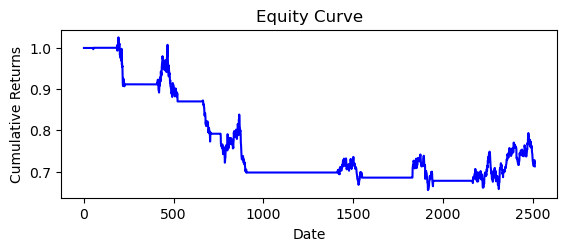

In [31]:
# Equity curve
plt.subplot(2, 1, 1)
plt.plot(data['Cumulative_Returns'], color='blue')
plt.title('Equity Curve')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')

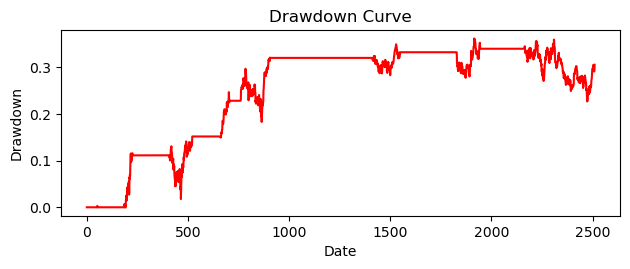

In [32]:
# Drawdown curve
plt.subplot(2, 1, 2)
plt.plot(data['Drawdown'], color='red')
plt.title('Drawdown Curve')
plt.xlabel('Date')
plt.ylabel('Drawdown')

plt.tight_layout()
plt.show()